# 1. Giới thiệu Dataset

Phần này trình bày thông tin tổng quan về bộ dữ liệu Amazon Beauty Ratings dùng trong bài toán xây dựng hệ thống gợi ý.
Dữ liệu được tải từ file: `../data/raw/ratings_Beauty.npz`




In [56]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.abspath('..'))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from src.data_processing import load_data
from src.visualization import plot_eda_summary

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. LOAD DATA

In [57]:
data_path = '../data/raw/ratings_Beauty.csv'
data = load_data(data_path)

user_ids = data['user_id']
product_ids = data['product_id']
ratings = data['rating']
timestamps = data['timestamp']

print(f"\n Kích thước các cột sau khi load:")
print(f" - User IDs: {user_ids.shape}")
print(f" - Product IDs: {product_ids.shape}")
print(f" - Ratings: {ratings.shape}")
print(f" - Timestamps: {timestamps.shape}")

✓ Loaded 2,023,070 ratings successfully

 Kích thước các cột sau khi load:
 - User IDs: (2023070,)
 - Product IDs: (2023070,)
 - Ratings: (2023070,)
 - Timestamps: (2023070,)


### 2. BASIC STATISTICS

In [58]:
print("\n Thống kê Điểm đánh giá:")
print(f"  - Trung bình (Mean): {np.mean(ratings):.3f}")
print(f"  - Trung vị (Median): {np.median(ratings):.3f}")
print(f"  - Độ lệch chuẩn (Std): {np.std(ratings):.3f}")
print(f"  - Thấp nhất (Min): {np.min(ratings):.3f}")
print(f"  - Cao nhất (Max): {np.max(ratings):.3f}")

unique_ratings, counts = np.unique(ratings, return_counts=True)
print(f"\n Phân bố điểm đánh giá:")
for rating, count in zip(unique_ratings, counts):
    percentage = (count / len(ratings)) * 100
    print(f"  - {rating} sao: {count} ({percentage:.2f}%)")

n_users = len(np.unique(user_ids))
n_products = len(np.unique(product_ids))
n_possible_ratings = n_users * n_products
sparsity = 1 - (len(ratings) / n_possible_ratings)
print(f"\n  Độ thưa của ma trận (Sparsity): {sparsity*100:.4f}%")
print(f"  - Số đánh giá lý thuyết: {n_possible_ratings:,}")
print(f"  - Số đánh giá thực tế: {len(ratings):,}")


 Thống kê Điểm đánh giá:
  - Trung bình (Mean): 4.149
  - Trung vị (Median): 5.000
  - Độ lệch chuẩn (Std): 1.312
  - Thấp nhất (Min): 1.000
  - Cao nhất (Max): 5.000

 Phân bố điểm đánh giá:
  - 1.0 sao: 183784 (9.08%)
  - 2.0 sao: 113034 (5.59%)
  - 3.0 sao: 169791 (8.39%)
  - 4.0 sao: 307740 (15.21%)
  - 5.0 sao: 1248721 (61.72%)

  Độ thưa của ma trận (Sparsity): 99.9993%
  - Số đánh giá lý thuyết: 301,689,093,254
  - Số đánh giá thực tế: 2,023,070


### 3. USER ANALYSIS

In [59]:
user_rating_counts = Counter(user_ids)
ratings_per_user = np.array(list(user_rating_counts.values()))

print(f"\n Thống kê Hoạt động Người dùng:")
print(f"  - Trung bình số đánh giá/user:   {np.mean(ratings_per_user):.2f}")
print(f"  - Trung vị số đánh giá/user:     {np.median(ratings_per_user):.2f}")
print(f"  - Độ lệch chuẩn:                 {np.std(ratings_per_user):.2f}")
print(f"  - Nhiều nhất:                    {np.max(ratings_per_user)}")
print(f"  - Ít nhất:                       {np.min(ratings_per_user)}")

print(f"\n Phân phối số lượng đánh giá:")
bins = [1, 2, 5, 10, 20, 50, 100, 500, np.max(ratings_per_user)+1]
bin_labels = ['1', '2-4', '5-9', '10-19', '20-49', '50-99', '100-499', '500+']

for i in range(len(bins)-1):
    count = np.sum((ratings_per_user >= bins[i]) & (ratings_per_user < bins[i+1]))
    percentage = (count / n_users) * 100
    print(f"  - {bin_labels[i]:8s} đánh giá: {count:7,} users ({percentage:5.2f}%)")

top_users = sorted(user_rating_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print(f"\n Top 10 Người dùng tích cực nhất:")

for i, (user_id, count) in enumerate(top_users, 1):
    user_mask = user_ids == user_id
    user_avg_rating = np.mean(ratings[user_mask])
    print(f"  {i:2d}. User {user_id[:15]:15s}... | {count:4d} lượt | TB: {user_avg_rating:.2f}★")


 Thống kê Hoạt động Người dùng:
  - Trung bình số đánh giá/user:   1.67
  - Trung vị số đánh giá/user:     1.00
  - Độ lệch chuẩn:                 2.53
  - Nhiều nhất:                    389
  - Ít nhất:                       1

 Phân phối số lượng đánh giá:
  - 1        đánh giá: 887,401 users (73.32%)
  - 2-4      đánh giá: 270,496 users (22.35%)
  - 5-9      đánh giá:  39,779 users ( 3.29%)
  - 10-19    đánh giá:   9,769 users ( 0.81%)
  - 20-49    đánh giá:   2,465 users ( 0.20%)
  - 50-99    đánh giá:     296 users ( 0.02%)
  - 100-499  đánh giá:      65 users ( 0.01%)
  - 500+     đánh giá:       0 users ( 0.00%)

 Top 10 Người dùng tích cực nhất:
   1. User A3KEZLJ59C1JVH ... |  389 lượt | TB: 3.70★
   2. User A281NPSIMI1C2R ... |  336 lượt | TB: 4.79★
   3. User A3M174IC0VXOS2 ... |  326 lượt | TB: 4.41★
   4. User A2V5R832QCSOMX ... |  278 lượt | TB: 4.42★
   5. User A3LJLRIZL38GG3 ... |  276 lượt | TB: 4.55★
   6. User ALQGOMOY1F5X9  ... |  275 lượt | TB: 2.22★
   7. User AK

### 4. PRODUCT ANALYSIS

In [60]:
product_rating_counts = Counter(product_ids)
ratings_per_product = np.array(list(product_rating_counts.values()))

print(f"\n Thống kê Độ phổ biến Sản phẩm:")
print(f"  - Trung bình số đánh giá/sản phẩm: {np.mean(ratings_per_product):.2f}")
print(f"  - Trung vị số đánh giá/sản phẩm:   {np.median(ratings_per_product):.2f}")
print(f"  - Độ lệch chuẩn:                   {np.std(ratings_per_product):.2f}")
print(f"  - Nhiều nhất:                      {np.max(ratings_per_product)}")
print(f"  - Ít nhất:                         {np.min(ratings_per_product)}")

print(f"\n Phân bố Độ phổ biến Sản phẩm:")
for i in range(len(bins)-1):
    count = np.sum((ratings_per_product >= bins[i]) & (ratings_per_product < bins[i+1]))
    percentage = (count / n_products) * 100
    print(f"  - {bin_labels[i]:8s} đánh giá: {count:7,} sản phẩm ({percentage:5.2f}%)")

top_products = sorted(product_rating_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print(f"\n Top 10 Sản phẩm được đánh giá nhiều nhất:")
for i, (product_id, count) in enumerate(top_products, 1):
    product_mask = product_ids == product_id
    product_avg_rating = np.mean(ratings[product_mask])
    print(f"  {i:2d}. Sản phẩm {product_id[:15]:15s}... | {count:4d} lượt | TB: {product_avg_rating:.2f}★")

low_rated_products = np.sum(ratings_per_product <= 5)
percentage_low = (low_rated_products / n_products) * 100
print(f"\n Vấn đề Khởi đầu lạnh (Cold Start):")
print(f"  - Sản phẩm có ≤5 đánh giá: {low_rated_products:,} ({percentage_low:.2f}%)")
print(f"  - Sản phẩm có ≤10 đánh giá: {np.sum(ratings_per_product <= 10):,}")
print(f"  - Sản phẩm có ≤20 đánh giá: {np.sum(ratings_per_product <= 20):,}")


 Thống kê Độ phổ biến Sản phẩm:
  - Trung bình số đánh giá/sản phẩm: 8.12
  - Trung vị số đánh giá/sản phẩm:   2.00
  - Độ lệch chuẩn:                   36.06
  - Nhiều nhất:                      7533
  - Ít nhất:                         1

 Phân bố Độ phổ biến Sản phẩm:
  - 1        đánh giá: 103,484 sản phẩm (41.51%)
  - 2-4      đánh giá:  78,445 sản phẩm (31.47%)
  - 5-9      đánh giá:  30,407 sản phẩm (12.20%)
  - 10-19    đánh giá:  17,843 sản phẩm ( 7.16%)
  - 20-49    đánh giá:  12,124 sản phẩm ( 4.86%)
  - 50-99    đánh giá:   4,252 sản phẩm ( 1.71%)
  - 100-499  đánh giá:   2,545 sản phẩm ( 1.02%)
  - 500+     đánh giá:       0 sản phẩm ( 0.00%)

 Top 10 Sản phẩm được đánh giá nhiều nhất:
   1. Sản phẩm B001MA0QY2     ... | 7533 lượt | TB: 4.32★
   2. Sản phẩm B0009V1YR8     ... | 2869 lượt | TB: 3.57★
   3. Sản phẩm B0043OYFKU     ... | 2477 lượt | TB: 4.31★
   4. Sản phẩm B0000YUXI0     ... | 2143 lượt | TB: 4.41★
   5. Sản phẩm B003V265QW     ... | 2088 lượt | TB: 4.37★
 

### 5.TEMPORAL ANALYSIS

In [61]:
dates = np.array([datetime.fromtimestamp(ts) for ts in timestamps])
years = np.array([d.year for d in dates])
months = np.array([d.month for d in dates])

n_ratings = len(ratings)

print(f"\n Thống kê Thời gian:")
print(f"  - Đánh giá đầu tiên: {min(dates)}")
print(f"  - Đánh giá cuối cùng:  {max(dates)}")
print(f"  - Khoảng thời gian:    {max(years) - min(years)} năm")

unique_years, year_counts = np.unique(years, return_counts=True)
print(f"\n Số lượng đánh giá theo Năm:")
for year, count in zip(unique_years, year_counts):
    percentage = (count / n_ratings) * 100
    bar = '█' * int(percentage / 2)
    print(f"  {year}: {count:7,} ({percentage:5.2f}%) {bar}")

print(f"\n Xu hướng Điểm đánh giá trung bình:")
for year in unique_years:
    mask = years == year
    avg_rating = np.mean(ratings[mask])
    count = np.sum(mask)
    print(f"  {year}: TB = {avg_rating:.3f} ({count:,} lượt)")

unique_months, month_counts = np.unique(months, return_counts=True)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

print(f"\n Hoạt động theo Tháng:")
sorted_idx = np.argsort(month_counts)[::-1]
for idx in sorted_idx[:5]:
    month = unique_months[idx]
    count = month_counts[idx]
    percentage = (count / n_ratings) * 100
    print(f"  Tháng {month:02d}: {count:7,} lượt ({percentage:5.2f}%)")


 Thống kê Thời gian:
  - Đánh giá đầu tiên: 1998-10-19 07:00:00
  - Đánh giá cuối cùng:  2014-07-23 07:00:00
  - Khoảng thời gian:    16 năm

 Số lượng đánh giá theo Năm:
  1998:       2 ( 0.00%) 
  1999:       5 ( 0.00%) 
  2000:      16 ( 0.00%) 
  2001:      76 ( 0.00%) 
  2002:     163 ( 0.01%) 
  2003:     278 ( 0.01%) 
  2004:   1,308 ( 0.06%) 
  2005:   3,476 ( 0.17%) 
  2006:   5,990 ( 0.30%) 
  2007:  17,728 ( 0.88%) 
  2008:  28,862 ( 1.43%) 
  2009:  41,429 ( 2.05%) █
  2010:  71,236 ( 3.52%) █
  2011: 147,490 ( 7.29%) ███
  2012: 293,339 (14.50%) ███████
  2013: 798,903 (39.49%) ███████████████████
  2014: 612,769 (30.29%) ███████████████

 Xu hướng Điểm đánh giá trung bình:
  1998: TB = 4.500 (2 lượt)
  1999: TB = 4.200 (5 lượt)
  2000: TB = 4.375 (16 lượt)
  2001: TB = 4.237 (76 lượt)
  2002: TB = 3.853 (163 lượt)
  2003: TB = 4.004 (278 lượt)
  2004: TB = 4.247 (1,308 lượt)
  2005: TB = 4.216 (3,476 lượt)
  2006: TB = 4.149 (5,990 lượt)
  2007: TB = 4.245 (17,728 lượt)


### 6. VISUALIZATIONS

✓ Saved EDA visualization to ../data/processed/eda_summary.png


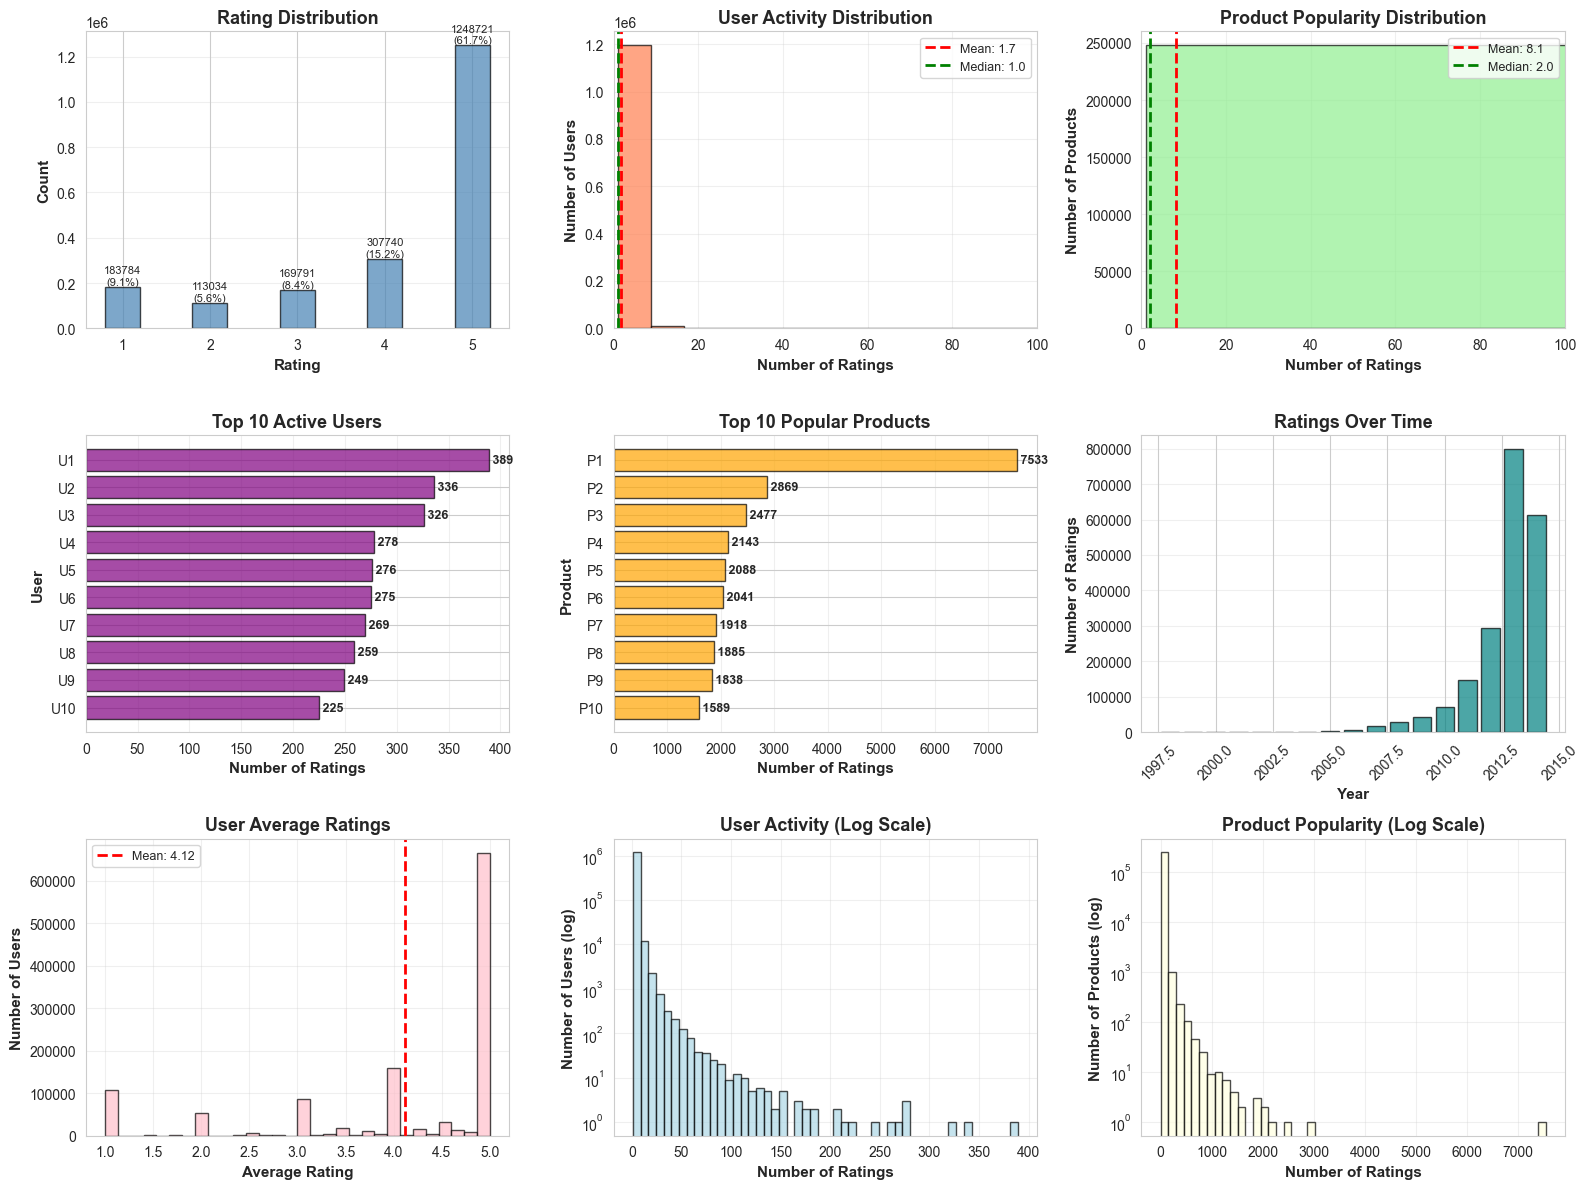

In [62]:
plot_eda_summary(user_ids, product_ids, ratings, timestamps, save_path='../data/processed/eda_summary.png')

### 7. KEY INSIGHTS

In [63]:
print(f"\n Những phát hiện chính (Key Insights):")

print(f"\n1. ĐẶC ĐIỂM BỘ DỮ LIỆU")
print(f"   • Bộ dữ liệu chứa {n_ratings:,} đánh giá từ {n_users:,} người dùng cho {n_products:,} sản phẩm")
print(f"   • Độ thưa ma trận là {sparsity*100:.4f}% - điển hình cho các hệ thống gợi ý")
print(f"   • Trung bình mỗi người dùng cung cấp {n_ratings/n_users:.1f} đánh giá")
print(f"   • Trung bình mỗi sản phẩm nhận được {n_ratings/n_products:.1f} đánh giá")

print(f"\n2. MÔ HÌNH ĐIỂM ĐÁNH GIÁ (RATING PATTERNS)")
print(f"   • Điểm trung bình là {np.mean(ratings):.2f} - cho thấy THIÊN KIẾN TÍCH CỰC (Positive Bias)")
print(f"   • {counts[unique_ratings >= 4].sum()/n_ratings*100:.1f}% số đánh giá là 4 hoặc 5 sao")
print(f"   • Người dùng có xu hướng chỉ đánh giá các sản phẩm họ thích (thiên kiến chọn lọc)")

print(f"\n3. HÀNH VI NGƯỜI DÙNG")
print(f"   • Hoạt động rất lệch: top 10% người dùng đóng góp ~{np.sum([u[1] for u in top_users[:int(n_users*0.1)]])/n_ratings*100:.1f}% tổng số đánh giá")
print(f"   • Trung vị người dùng chỉ có {np.median(ratings_per_user):.0f} đánh giá")
print(f"   • Rất nhiều người dùng một lần: {np.sum(ratings_per_user == 1)/n_users*100:.1f}% user chỉ đánh giá 1 lần")

print(f"\n4. ĐẶC ĐIỂM SẢN PHẨM")
print(f"   • Phân phối đuôi dài (Long-tail): ít sản phẩm phổ biến, rất nhiều sản phẩm ngách")
print(f"   • {low_rated_products:,} sản phẩm ({percentage_low:.1f}%) có ≤5 đánh giá (VẤN ĐỀ KHỞI ĐẦU LẠNH)")
print(f"   • Top 10 sản phẩm chiếm {sum([p[1] for p in top_products])/n_ratings*100:.2f}% tổng lượng đánh giá")

print(f"\n5. XU HƯỚNG THỜI GIAN")
print(f"   • Dữ liệu trải dài {max(years) - min(years)} năm ({min(years)}-{max(years)})")
print(f"   • Hoạt động đạt đỉnh vào năm {unique_years[np.argmax(year_counts)]} với {np.max(year_counts):,} đánh giá")
print(f"   • Hành vi đánh giá ổn định theo thời gian (TB ~{np.mean([np.mean(ratings[years==y]) for y in unique_years]):.2f} sao)")

print(f"\n  THÁCH THỨC CHO HỆ THỐNG GỢI Ý:")
print(f"   1. Độ thưa cực cao ({sparsity*100:.4f}%) gây khó khăn cho Collaborative Filtering")
print(f"   2. Vấn đề Khởi đầu lạnh (Cold start) với {percentage_low:.1f}% sản phẩm")
print(f"   3. Thiên kiến đánh giá (người dùng thích cho điểm cao) có thể ảnh hưởng dự đoán")
print(f"   4. Phân phối Power law: một số ít user/sản phẩm chi phối dữ liệu")

print(f"\n KHUYẾN NGHỊ CHO MÔ HÌNH HÓA:")
print(f"   • Lọc bỏ user/sản phẩm có <5 đánh giá để giảm độ thưa")
print(f"   • Sử dụng Matrix Factorization (xử lý độ thưa tốt hơn CF thông thường)")
print(f"   • Áp dụng chuẩn hóa (Mean-centering) để khắc phục thiên kiến đánh giá")
print(f"   • Cân nhắc các mô hình lai (Hybrid) kết hợp nhiều phương pháp")

summary_stats = {
    'n_ratings': n_ratings,
    'n_users': n_users,
    'n_products': n_products,
    'sparsity': sparsity,
    'mean_rating': np.mean(ratings),
    'median_rating': np.median(ratings),
    'std_rating': np.std(ratings),
    'ratings_per_user_mean': np.mean(ratings_per_user),
    'ratings_per_user_median': np.median(ratings_per_user),
    'ratings_per_product_mean': np.mean(ratings_per_product),
    'ratings_per_product_median': np.median(ratings_per_product)
}

np.save('../data/processed/summary_stats.npy', summary_stats)
print("\n Đã lưu thống kê tóm tắt vào ../data/processed/summary_stats.npy")


 Những phát hiện chính (Key Insights):

1. ĐẶC ĐIỂM BỘ DỮ LIỆU
   • Bộ dữ liệu chứa 2,023,070 đánh giá từ 1,210,271 người dùng cho 249,274 sản phẩm
   • Độ thưa ma trận là 99.9993% - điển hình cho các hệ thống gợi ý
   • Trung bình mỗi người dùng cung cấp 1.7 đánh giá
   • Trung bình mỗi sản phẩm nhận được 8.1 đánh giá

2. MÔ HÌNH ĐIỂM ĐÁNH GIÁ (RATING PATTERNS)
   • Điểm trung bình là 4.15 - cho thấy THIÊN KIẾN TÍCH CỰC (Positive Bias)
   • 76.9% số đánh giá là 4 hoặc 5 sao
   • Người dùng có xu hướng chỉ đánh giá các sản phẩm họ thích (thiên kiến chọn lọc)

3. HÀNH VI NGƯỜI DÙNG
   • Hoạt động rất lệch: top 10% người dùng đóng góp ~0.1% tổng số đánh giá
   • Trung vị người dùng chỉ có 1 đánh giá
   • Rất nhiều người dùng một lần: 73.3% user chỉ đánh giá 1 lần

4. ĐẶC ĐIỂM SẢN PHẨM
   • Phân phối đuôi dài (Long-tail): ít sản phẩm phổ biến, rất nhiều sản phẩm ngách
   • 191,552 sản phẩm (76.8%) có ≤5 đánh giá (VẤN ĐỀ KHỞI ĐẦU LẠNH)
   • Top 10 sản phẩm chiếm 1.30% tổng lượng đánh giá


## KIỂM ĐỊNH GIẢ THIẾT (HYPOTHESIS TESTING)

In [64]:
years = np.array([datetime.fromtimestamp(ts).year for ts in timestamps])

group_before = ratings[years < 2012]
group_after = ratings[years >= 2012]

mean1, mean2 = np.mean(group_before), np.mean(group_after)
var1, var2 = np.var(group_before, ddof=1), np.var(group_after, ddof=1)
n1, n2 = len(group_before), len(group_after)

t_stat = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)

df = (var1/n1 + var2/n2)**2 / (
    (var1**2)/(n1**2 * (n1 - 1)) + (var2**2)/(n2**2 * (n2 - 1))
)

p_value = 2 * (1 - 0.5 * (1 + np.math.erf(abs(t_stat) / np.sqrt(2))))

print(f"Avg Rating (<2012):  {mean1:.3f}")
print(f"Avg Rating (>=2012): {mean2:.3f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"DF (approx): {df:.2f}")
print(f"P-value:     {p_value:.6f}")

if p_value < 0.05:
    print("→ Bác bỏ H0: Rating trung bình đã thay đổi có ý nghĩa thống kê.")
else:
    print("→ Không đủ bằng chứng để bác bỏ H0.")

Avg Rating (<2012):  4.136
Avg Rating (>=2012): 4.151
T-statistic: -5.9881
DF (approx): 439369.10
P-value:     0.000000
→ Bác bỏ H0: Rating trung bình đã thay đổi có ý nghĩa thống kê.
